<a href="https://colab.research.google.com/github/Kanyi254/sentiment-analysis/blob/Brandon/Brandon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('tweet.csv', encoding='ISO-8859-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
apple_google_df = df[df['emotion_in_tweet_is_directed_at'].str.contains('Apple|Google', na=False, case=False)]
# Display the count of tweets
apple_google_count = apple_google_df['emotion_in_tweet_is_directed_at'].value_counts()
print(apple_google_count)

# Display the first few rows of this filtered data
print(apple_google_df.head())

emotion_in_tweet_is_directed_at
Apple                              661
Google                             430
Other Google product or service    293
Other Apple product or service      35
Name: count, dtype: int64
                                           tweet_text  \
4   @sxtxstate great stuff on Fri #SXSW: Marissa M...   
9   Counting down the days to #sxsw plus strong Ca...   
13  Gotta love this #SXSW Google Calendar featurin...   
27  someone started an #austin @PartnerHub group i...   
38  @mention  - False Alarm: Google Circles Not Co...   

    emotion_in_tweet_is_directed_at  \
4                            Google   
9                             Apple   
13  Other Google product or service   
27  Other Google product or service   
38                           Google   

   is_there_an_emotion_directed_at_a_brand_or_product  
4                                    Positive emotion  
9                                    Positive emotion  
13                                   Pos

In [6]:
# Check for missing values
missing_values = apple_google_df.isnull().sum()
print(missing_values)

# Drop rows with missing sentiment labels
apple_google_df.dropna(subset=['emotion_in_tweet_is_directed_at'], inplace=True)

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64


<ipython-input-6-0ec0e54eb043>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_google_df.dropna(subset=['emotion_in_tweet_is_directed_at'], inplace=True)


In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the sentiment labels
apple_google_df['sentiment_encoded'] = label_encoder.fit_transform(apple_google_df['is_there_an_emotion_directed_at_a_brand_or_product'])

# Display the unique classes and their encoded labels
print(label_encoder.classes_)
print(apple_google_df[['is_there_an_emotion_directed_at_a_brand_or_product', 'sentiment_encoded']].head())


["I can't tell" 'Negative emotion' 'No emotion toward brand or product'
 'Positive emotion']
   is_there_an_emotion_directed_at_a_brand_or_product  sentiment_encoded
4                                    Positive emotion                  3
9                                    Positive emotion                  3
13                                   Positive emotion                  3
27                                   Positive emotion                  3
38                                   Negative emotion                  1


<ipython-input-7-73f45a4f217f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_google_df['sentiment_encoded'] = label_encoder.fit_transform(apple_google_df['is_there_an_emotion_directed_at_a_brand_or_product'])


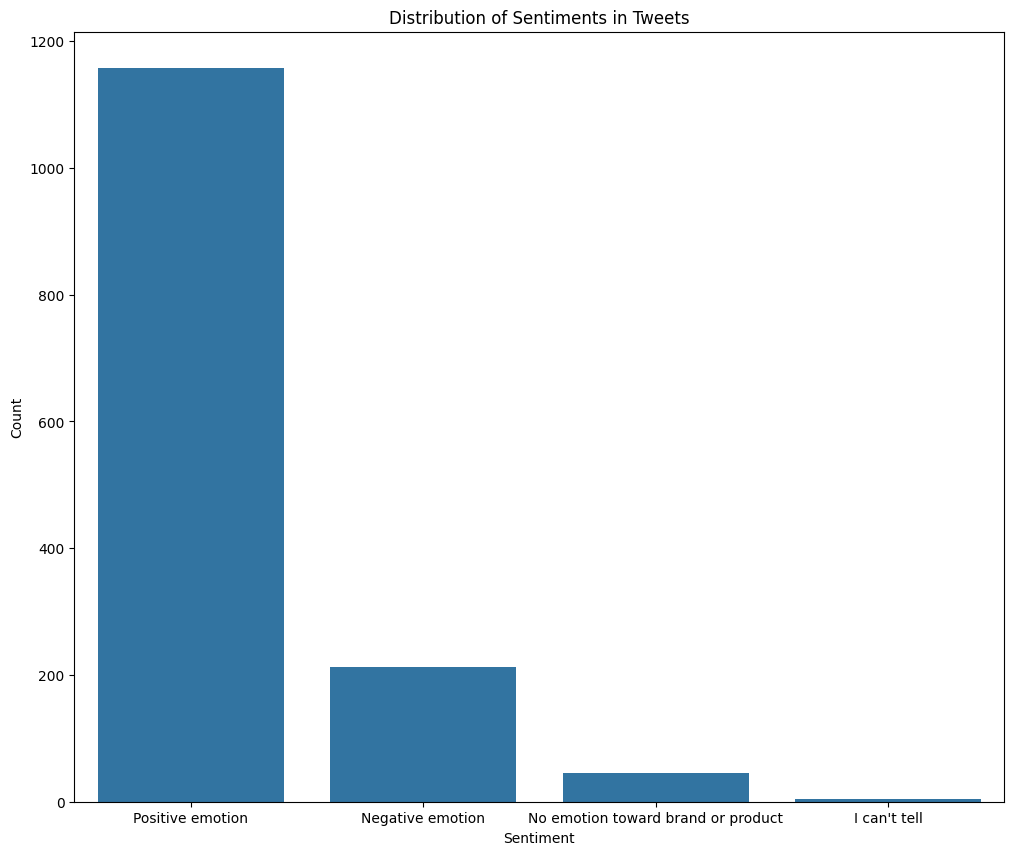

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment classes
plt.figure(figsize=(12, 10))
sns.countplot(data=apple_google_df, x='is_there_an_emotion_directed_at_a_brand_or_product')
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the tweet texts into TF-IDF features
X = tfidf_vectorizer.fit_transform(apple_google_df['tweet_text']).toarray()
y = apple_google_df['sentiment_encoded']

print(X.shape)  # Shape of the TF-IDF features


(1419, 3235)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the unique values in the encoded sentiment column
print(apple_google_df['sentiment_encoded'].unique())

# Check the classes in the label encoder
print(label_encoder.classes_)


[3 1 2 0]
["I can't tell" 'Negative emotion' 'No emotion toward brand or product'
 'Positive emotion']


In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Evaluation for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 80)


Training Logistic Regression...
Evaluation for Logistic Regression:

              precision    recall  f1-score   support

           1       0.75      0.14      0.23        44
           2       0.00      0.00      0.00         8
           3       0.84      1.00      0.91       232

    accuracy                           0.83       284
   macro avg       0.53      0.38      0.38       284
weighted avg       0.80      0.83      0.78       284

--------------------------------------------------------------------------------
Training Support Vector Machine...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation for Support Vector Machine:

              precision    recall  f1-score   support

           1       0.91      0.23      0.36        44
           2       0.00      0.00      0.00         8
           3       0.85      1.00      0.92       232

    accuracy                           0.85       284
   macro avg       0.59      0.41      0.43       284
weighted avg       0.84      0.85      0.81       284

--------------------------------------------------------------------------------
Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation for Random Forest:

              precision    recall  f1-score   support

           1       0.83      0.23      0.36        44
           2       1.00      0.12      0.22         8
           3       0.85      1.00      0.92       232

    accuracy                           0.85       284
   macro avg       0.90      0.45      0.50       284
weighted avg       0.85      0.85      0.81       284

--------------------------------------------------------------------------------
Training Naive Bayes...
Evaluation for Naive Bayes:

              precision    recall  f1-score   support

           1       1.00      0.02      0.04        44
           2       0.00      0.00      0.00         8
           3       0.82      1.00      0.90       232

    accuracy                           0.82       284
   macro avg       0.61      0.34      0.32       284
weighted avg       0.82      0.82      0.74       284

-------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.metrics import accuracy_score, f1_score

# Dictionary to store the performance of each model
model_performance = {}

for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average to handle class imbalance

    model_performance[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1
    }

# Display the performance of each model
for model_name, performance in model_performance.items():
    print(f"{model_name} - Accuracy: {performance['Accuracy']:.4f}, F1 Score: {performance['F1 Score']:.4f}")


Logistic Regression - Accuracy: 0.8345, F1 Score: 0.7787
Support Vector Machine - Accuracy: 0.8521, F1 Score: 0.8069
Random Forest - Accuracy: 0.8521, F1 Score: 0.8119
Naive Bayes - Accuracy: 0.8204, F1 Score: 0.7429


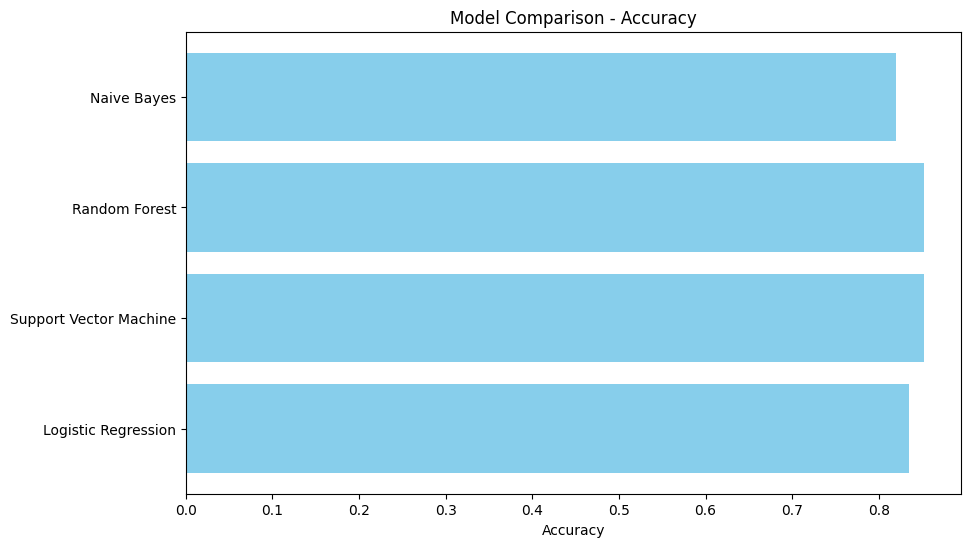

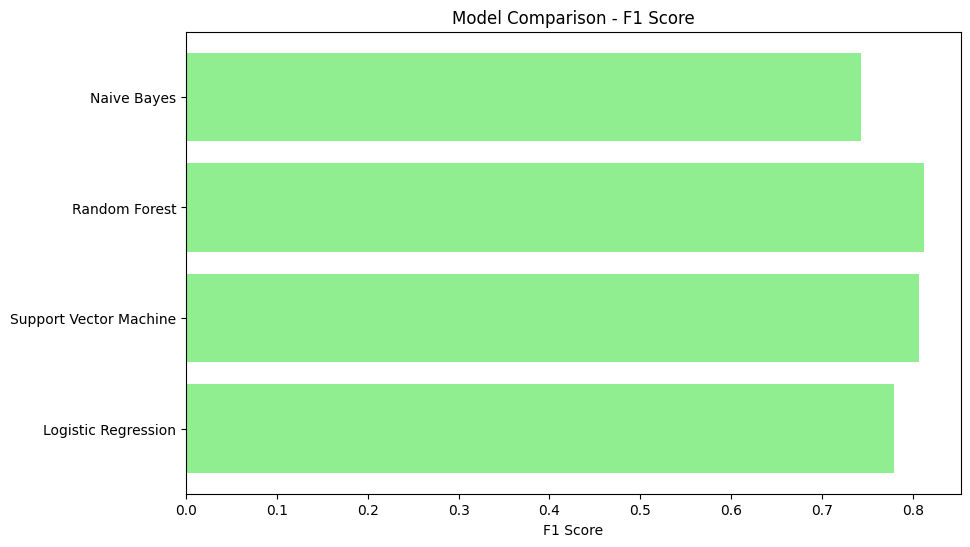

In [18]:
import matplotlib.pyplot as plt

# Extract performance metrics
model_names = list(model_performance.keys())
accuracies = [model_performance[model]['Accuracy'] for model in model_names]
f1_scores = [model_performance[model]['F1 Score'] for model in model_names]

# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Accuracy')
plt.show()

# Plot F1 Score
plt.figure(figsize=(10, 6))
plt.barh(model_names, f1_scores, color='lightgreen')
plt.title('Model Comparison - F1 Score')
plt.xlabel('F1 Score')
plt.show()


Based on the provided accuracy and F1 scores, the Random Forest model appears to be the best performing among the four models tested.

 *Here's a breakdown of why:

Accuracy: Random Forest achieves the highest accuracy (85.21%) tied with Support Vector Machine, meaning it correctly predicts the sentiment for the largest proportion of tweets.

F1 Score: Random Forest also boasts the highest F1 score (0.8119). The F1 score is a balanced measure that considers both precision and recall. A high F1 score indicates that the model is good at identifying the positive cases (correctly predicting sentiment) while also minimizing false positives and false negatives.


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Randomized Search CV to find the best parameters
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                      n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit the randomized search model
rf_random_search.fit(X_train, y_train)

# Best parameters found
print(f"Best parameters: {rf_random_search.best_params_}")

# Use the best model for prediction
best_rf_model = rf_random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


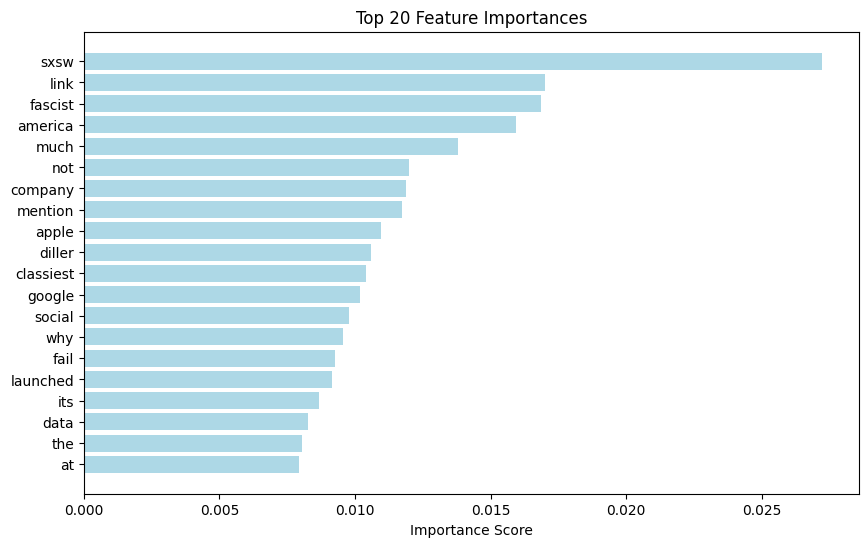

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importance from the best Random Forest model
feature_importances = best_rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Get the feature names (TF-IDF terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Plot the top 20 important features
plt.figure(figsize=(10, 6))
plt.title('Top 20 Feature Importances')
plt.barh([feature_names[i] for i in indices[:20]], feature_importances[indices[:20]], color='lightblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Importance Score')
plt.show()


In [21]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation (using 5 folds)
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.81938326 0.85022026 0.83700441 0.81938326 0.84140969]
Mean Cross-Validation Accuracy: 0.8335


In [23]:
# Evaluate the performance of the tuned Random Forest model on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Check the unique values in y_test and y_pred
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

# Check the number of classes in label_encoder
print("Number of classes in label_encoder:", len(label_encoder.classes_))

# If a class is missing in y_test or y_pred, adjust label_encoder.classes_ accordingly

# For example, if class 2 is missing:
# label_encoder.classes_ = np.array([0, 1, 3])

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Unique values in y_test: [1 2 3]
Unique values in y_pred: [1 3]
Number of classes in label_encoder: 4


ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

In [24]:
# Get user input for a new tweet
new_tweet = input("Enter a tweet about Apple or Google: ")

# Transform the new tweet into TF-IDF features
new_tweet_tfidf = tfidf_vectorizer.transform([new_tweet]).toarray()

# Make a prediction using the best Random Forest model
predicted_sentiment_encoded = best_rf_model.predict(new_tweet_tfidf)[0]

# Decode the predicted sentiment back to its original label
predicted_sentiment = label_encoder.inverse_transform([predicted_sentiment_encoded])[0]

# Print the prediction
print(f"Predicted Sentiment: {predicted_sentiment}")


Enter a tweet about Apple or Google: Apple has shitty products. they basically haven't changed anything from iphone 11
Predicted Sentiment: Positive emotion
